## People to Vector Algorithm

To find unique visitors, we assign a feature vector to each detected person.  
We then use these feature vectors to count number of unique visitors.

Our `people_reid` package uses the open source algorithm available at https://github.com/layumi/Person_reID_baseline_pytorch.

In [1]:
from packages.object_detection import ObjectDetector
from packages.utils.images import read_image, read_images_in_directory
from packages.utils.videos import VideoSource
from packages.utils.visualization import display_image, add_detected_boxes_to_image_array, DynamicPlot
from packages.people2vector.model import ft_net, ft_net_dense, ft_net_NAS
from packages.people2vector import transform_image, transform_images, FeatureExtractor

from ipywidgets import interact
import time
import numpy as np

In [2]:
REID_FOLDER = 'people_crops'
DETECTOR = 'ssd_inception_v2'
VIDEO_PATH = './videos/example_01.mp4'

In [3]:
vs = VideoSource(VIDEO_PATH)

In [4]:
detector = ObjectDetector('ssd_inception_v2')

[INFO] loading model...
Done.


<IPython.core.display.Javascript object>


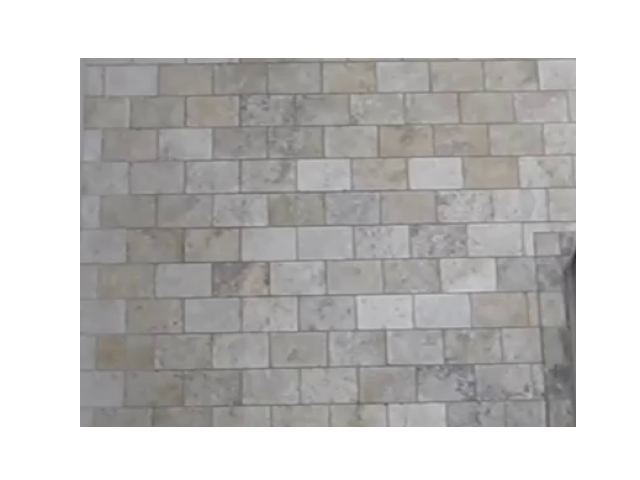

interactive(children=(IntSlider(value=0, description='x', max=1282), Output()), _dom_classes=('widget-interact…

<function __main__.update_image(x=0)>

In [5]:
%matplotlib notebook
plot = DynamicPlot()

def update_image(x = 0):
    frame = vs.get_frame(x)
    output_dict = detector.detect_people(frame)
    add_detected_boxes_to_image_array(frame, output_dict)
    plot.update_image(frame)

interact(update_image, x=(0, vs.get_total_frames() - 1, 1))

In [6]:
images = read_images_in_directory('./people_crops/')

In [7]:
# all_features = np.load('./people_features/example_01_features.npy')
all_features = np.load('./people_features/example_01_features_half.npy')
# fe = FeatureExtractor(saved_model_path='./person_reID_models/ft_ResNet50/net_last.pth')
# all_features = fe.extract_images_features(images, is_array=True)
# np.save('./people_features/example_01_features.npy', all_features)
all_features.shape

(539, 512)

running display


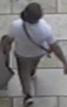

[90 92 88 86 73 95 78 37 96 77]
running display


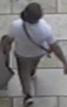

running display


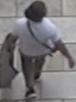

running display


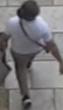

running display


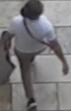

running display


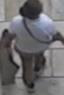

running display


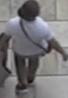

running display


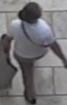

running display


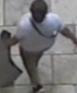

running display


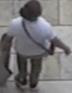

running display


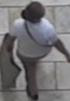

In [8]:
query_index = 90
query_feature = all_features[query_index, :]
image = images[query_index]
display_image(image)
scores = np.dot(all_features, query_feature)
sorted_index = np.argsort(scores)  #from small to large
sorted_index = sorted_index[::-1]
top_10_index = sorted_index[0: 10]
print(top_10_index)
for indx in top_10_index:
    display_image(images[indx])

running display


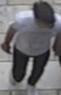

In [9]:
image = images[100]
display_image(image)

In [10]:
fe = FeatureExtractor(saved_model_path='./person_reID_models/ft_ResNet50/net_last.pth')

In [11]:
start_time = time.time()
feature_vec = fe.extract_image_features(image, is_array=True)
end_time = time.time()
print(end_time - start_time)

0.2817831039428711


In [12]:
feature_vec.shape

(1, 512)

In [13]:
# all_features = fe.extract_images_features(images, is_array=True)
# np.save('./people_features/example_01_features_half.npy', all_features)